In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 데이터 불러오기
file_path = '/content/drive/MyDrive/DATA SET/Boston.csv'

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat  medv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  


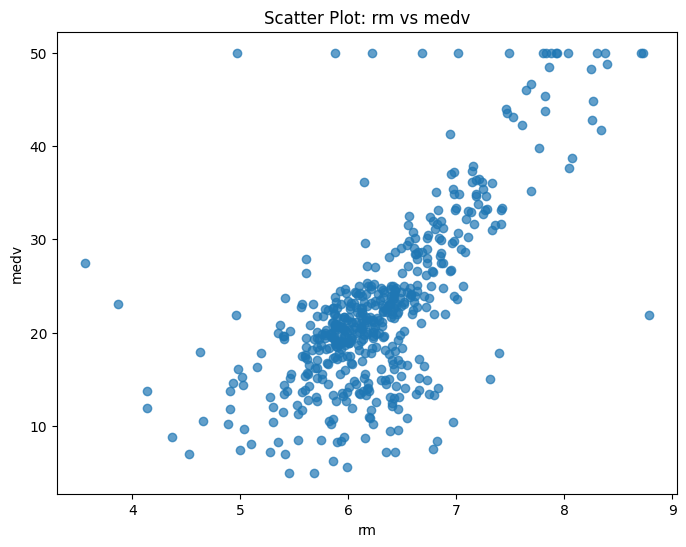

In [4]:
# ✅ 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# ✅ CSV 파일 불러오기
file_path = '/content/drive/MyDrive/DATA SET/Boston.csv'
df = pd.read_csv(file_path)

# ✅ 데이터 확인
print(df.head())

# ✅ 예: 종속변수와 독립변수 선택하기
# 예: 종속변수 'medv'(주택 가격), 독립변수 'rm'(방 개수)
x_var = 'rm'    # 독립변수
y_var = 'medv'  # 종속변수

# ✅ 산점도 그리기
plt.figure(figsize=(8,6))
plt.scatter(df[x_var], df[y_var], alpha=0.7)
plt.title(f'Scatter Plot: {x_var} vs {y_var}')
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.show()


/tmp/ipython-input-5-1972538611.py:16: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-1972538611.py:16: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-1972538611.py:16: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-1972538611.py:16: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-1972538611.py:16: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-1972538611.py:16: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-1972538611.py:16: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.

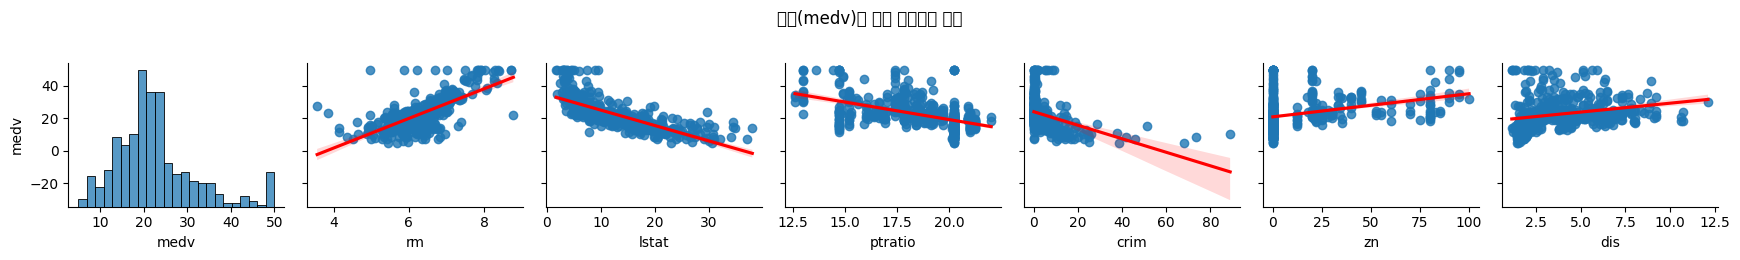

In [5]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/DATA SET/Boston.csv' #각자 자신이 가진 파일 경로로 수정
Boston = pd.read_csv(file_path, delimiter=',', na_values=['?'])
Boston = Boston.drop(columns=["Unnamed: 0"])
Boston = Boston.dropna()
Boston.head()

#전체적인 산점도 그래프 확인
sns.pairplot(Boston[['medv', 'rm', 'lstat', 'ptratio', 'crim', 'zn', 'dis']],
             y_vars='medv', kind='reg', plot_kws={'line_kws': {'color':'red'}})
plt.suptitle("집값(medv)과 주요 변수들의 관계", y=1.02)
plt.tight_layout()
plt.show()

In [7]:
import statsmodels.formula.api as smf

model_rm = smf.ols('medv ~ rm', data=Boston).fit()
print(model_rm.summary())

model_lstat = smf.ols('medv ~ lstat', data=Boston).fit()
print(model_lstat.summary())

model_crim = smf.ols('medv ~ crim', data=Boston).fit()
print(model_crim.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           2.49e-74
Time:                        05:17:54   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

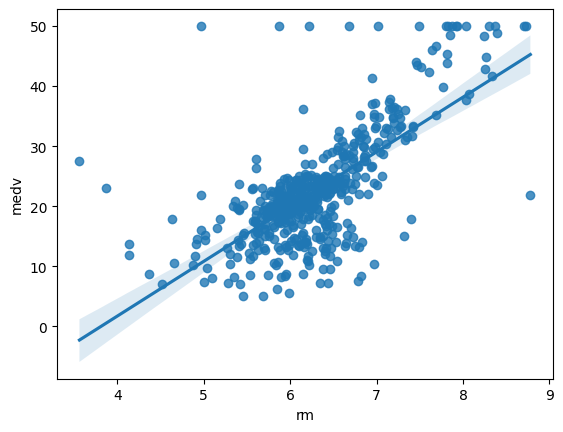

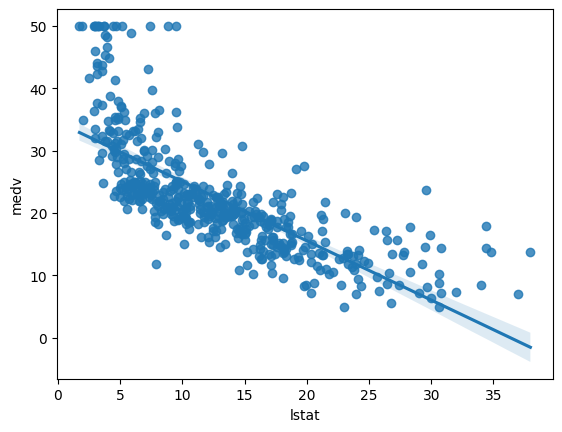

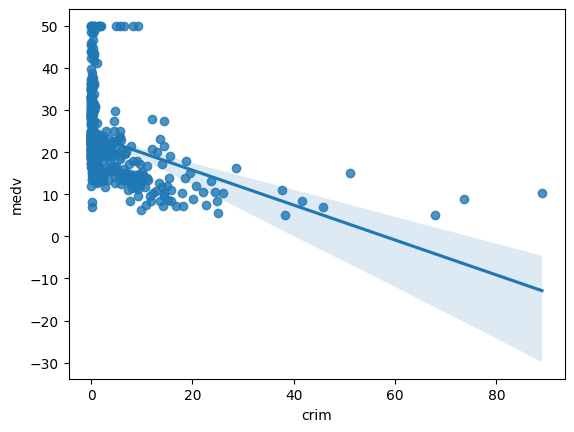

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 방 개수 vs 집값
sns.regplot(x='rm', y='medv', data=df)
plt.show()

# 저소득층 비율 vs 집값
sns.regplot(x='lstat', y='medv', data=df)
plt.show()

# 범죄율 vs 집값
sns.regplot(x='crim', y='medv', data=df)
plt.show()


In [9]:
import pandas as pd
import statsmodels.api as sm

# CSV 불러오기
file_path = '/content/drive/MyDrive/DATA SET/Boston.csv'
df = pd.read_csv(file_path)

# 독립변수(X)와 종속변수(y) 설정
X = df[['rm', 'lstat', 'crim']]  # 독립변수 3개
y = df['medv']                   # 종속변수

# 상수항 추가 (절편)
X = sm.add_constant(X)

# 다중회귀 모델 적합
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Wed, 09 Jul 2025   Prob (F-statistic):          1.01e-112
Time:                        05:25:43   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.4

In [15]:
import statsmodels.formula.api as smf

# Get all column names except 'medv'
independent_variables = '+'.join([col for col in Boston.columns if col != 'medv'])

model_all = smf.ols(f'medv ~ {independent_variables}', data=Boston).fit()
print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 09 Jul 2025   Prob (F-statistic):          2.23e-133
Time:                        05:56:12   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6173      4.936      8.431      0.0

In [16]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# X : medv를 제외한 독립변수만 선택
X = Boston.drop(columns=['medv'])
# 상수항 추가
X = sm.add_constant(X)

# VIF 계산
vif = pd.DataFrame()
vif["variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


   variable         VIF
0     const  535.526619
1      crim    1.767486
2        zn    2.298459
3     indus    3.987181
4      chas    1.071168
5       nox    4.369093
6        rm    1.912532
7       age    3.088232
8       dis    3.954037
9       rad    7.445301
10      tax    9.002158
11  ptratio    1.797060
12    lstat    2.870777


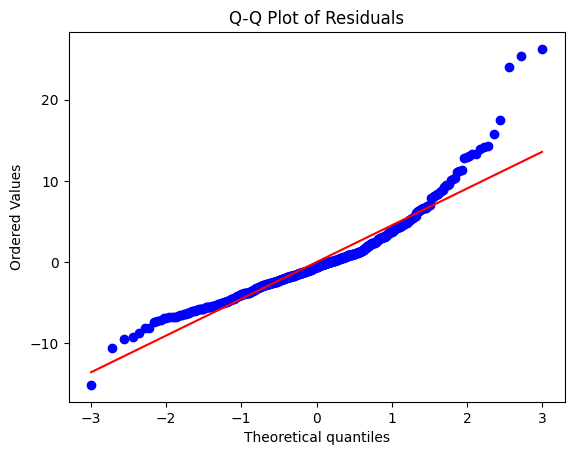

In [17]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# 잔차 가져오기
residuals = model_all.resid

# Q-Q Plot 그리기
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


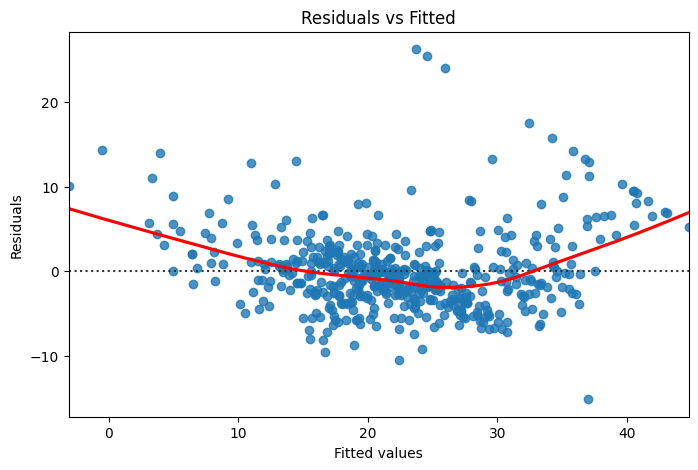

In [18]:
import seaborn as sns

# 예측값 vs 잔차 산점도
fitted = model_all.fittedvalues

plt.figure(figsize=(8,5))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()


In [19]:
import statsmodels.formula.api as smf

# indus, age 뺀 모델 식
model_reduced = smf.ols('medv ~ crim + zn + chas + nox + rm + dis + rad + tax + ptratio + lstat',
                        data=Boston).fit()

print(model_reduced.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.8
Date:                Wed, 09 Jul 2025   Prob (F-statistic):          1.73e-135
Time:                        06:02:59   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3078.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.4517      4.903      8.454      0.0

In [20]:
import statsmodels.api as sm

# X, y 준비
X = Boston.drop(columns=['medv'])
y = Boston['medv']

# 상수항 추가
X = sm.add_constant(X)

# 현재 변수 목록
variables = X.columns.tolist()

# 반복 제거 시작!
while True:
    model = sm.OLS(y, X[variables]).fit()
    p_values = model.pvalues.drop('const')
    max_pval = p_values.max()
    if max_pval > 0.05:
        worst_feature = p_values.idxmax()
        print(f"제거: {worst_feature} (p-value: {max_pval:.4f})")
        variables.remove(worst_feature)
    else:
        break

print(model.summary())


제거: indus (p-value: 0.8285)
제거: age (p-value: 0.7866)
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.8
Date:                Wed, 09 Jul 2025   Prob (F-statistic):          1.73e-135
Time:                        06:04:01   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3078.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [21]:
import statsmodels.api as sm
import pandas as pd

X = Boston.drop(columns=['medv'])
y = Boston['medv']

# 후보 변수 목록
candidates = X.columns.tolist()

# 시작은 상수항만
selected = []

while candidates:
    aic_with_candidates = []
    for candidate in candidates:
        temp = selected + [candidate]
        X_temp = sm.add_constant(X[temp])
        model = sm.OLS(y, X_temp).fit()
        aic_with_candidates.append((model.aic, candidate))
    aic_with_candidates.sort()
    best_new_aic, best_candidate = aic_with_candidates[0]

    if selected:
        X_old = sm.add_constant(X[selected])
        old_aic = sm.OLS(y, X_old).fit().aic
    else:
        old_aic = float('inf')

    if best_new_aic < old_aic:
        selected.append(best_candidate)
        candidates.remove(best_candidate)
        print(f"추가: {best_candidate} (AIC: {best_new_aic:.2f})")
    else:
        break

X_final = sm.add_constant(X[selected])
model = sm.OLS(y, X_final).fit()
print(model.summary())



추가: lstat (AIC: 3286.97)
추가: rm (AIC: 3171.54)
추가: ptratio (AIC: 3114.10)
추가: dis (AIC: 3097.36)
추가: nox (AIC: 3069.44)
추가: chas (AIC: 3057.94)
추가: zn (AIC: 3053.04)
추가: crim (AIC: 3047.77)
추가: rad (AIC: 3043.08)
추가: tax (AIC: 3031.94)
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.8
Date:                Wed, 09 Jul 2025   Prob (F-statistic):          1.73e-135
Time:                        06:04:16   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3078.
Df Model:                          10                                         
Covariance Type:            nonrobust                

In [22]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = Boston.drop(columns=['medv'])
y = Boston['medv']

# 학습 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링 (규제 모델은 표준화 필수!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LassoCV
lasso = LassoCV(cv=5)
lasso.fit(X_train_scaled, y_train)

print(f"Lasso best alpha: {lasso.alpha_}")
print("Lasso coefficients:")
print(dict(zip(X.columns, lasso.coef_)))

# RidgeCV
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge.fit(X_train_scaled, y_train)

print(f"Ridge best alpha: {ridge.alpha_}")
print("Ridge coefficients:")
print(dict(zip(X.columns, ridge.coef_)))


Lasso best alpha: 0.006863892263379668
Lasso coefficients:
{'crim': np.float64(-1.1074905783289204), 'zn': np.float64(0.6779353868875276), 'indus': np.float64(0.11211083840386317), 'chas': np.float64(0.787593486356983), 'nox': np.float64(-2.093363570407985), 'rm': np.float64(3.0097048244508358), 'age': np.float64(-0.08536882817027025), 'dis': np.float64(-3.0710023674918627), 'rad': np.float64(1.9365125076457606), 'tax': np.float64(-1.7472125983844586), 'ptratio': np.float64(-1.9794765007679576), 'lstat': np.float64(-3.8159022447819715)}
Ridge best alpha: 1.0
Ridge coefficients:
{'crim': np.float64(-1.1172180734187338), 'zn': np.float64(0.6931107214976595), 'indus': np.float64(0.14903562358100397), 'chas': np.float64(0.7905292250331463), 'nox': np.float64(-2.1053215955390034), 'rm': np.float64(3.012344833783294), 'age': np.float64(-0.1030156447655368), 'dis': np.float64(-3.08159351051137), 'rad': np.float64(1.9824739756770076), 'tax': np.float64(-1.8009637863480914), 'ptratio': np.float